# Installing Packages and Libraries

In [107]:
!pip install rake_nltk

import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
menus = pd.read_excel('Testdata_Entrees.xlsx',sheet_name='Sheet1',na_values=['TBD'])
menus.drop(['Menu_Id'],axis=1,inplace = True)
menus

,Item_Name,Item_Description
0,Chicken Tenders,Chicken Tenders Snacks Sides Food
1,Chicken Caesar Pasta Salad,Chicken Caesar Pasta Salad Salads Food
2,Mediterranean Pasta Salad,Mediterranean Pasta Salad Salads Food
3,Chicken Dippers,Chicken Dippers Snacks Sides Food
4,Taquitos,Taquitos Taquitos Food Choice of Monterey Jack...
...,...,...
9128,Buffalo Kiddie Fingerz,Buffalo Kiddie Fingerz w Buffalo Chicken Finge...
9129,Zax Pak Regular,Zax Pak w 12 Chicken Fingers Zax Sauce 1 Porti...
9130,Zax Pak Large,Buffalo Zax Pak w 18 Buffalo Chicken Fingers R...
9131,Buffalo Zax Pak Regular,Buffalo Zax Pak w 12 Buffalo Chicken Fingers R...


# Ingestion script

#Reading data directly from multiple sheets and concatinating it in a single dataframe.
Changed names to accumulate clerical errors of leading and trailing spaces.
Dropping (un)wanted columns from the data for initial testing.
Changing NaN values to blank for now.


In [112]:
# menus=pd.concat(pd.read_excel('Chef Menus complete.xlsx',sheet_name=None,na_values=['TBD']),ignore_index=False)
# menus.reset_index(level=0, inplace=True)
# menus.rename(columns={'level_0':'chefname',
#                        'Course 1':'course_1',
#                        'Course 2':'course_2',
#                        'Course 3 ':'course_3',
#                        'Course 4' :'course_4',
#                        'Menu Description ':'Menu_description',
#                      'Course 1 Description' : 'Course1_Description', 
#              'Course 1 Description' : 'Course1_Description',
#                          'Course 2 Description' : 'Course2_Description',
#                          'Course 3 Description' : 'Course3_Description',
#                          'Course 4 Description' :  'Course4_Description'},
#                  inplace=True)
# from nltk.corpus import stopwords
# print(stopwords.words('english'))



# menus.info(verbose=True)
# #menus.drop(['chefname','Menu_description','Cuisine Type','Dates available to cook this menu','course_1','course_2','course_3','course_4','course_summary','Price'], axis = 1,inplace = True)
# menus.drop(['chefname','Menu_description','Cuisine Type','Dates available to cook this menu','Price'], axis = 1,inplace = True) 
# #print(menus.columns)
menus['menu_name'] = menus['Item_Name']
menus = menus.set_index('menu_name')
menus = menus.replace(np.nan, '', regex=True)
menus

,Item_Name,Item_Description
menu_name,,
Chicken Tenders,Chicken Tenders,Chicken Tenders Snacks Sides Food
Chicken Caesar Pasta Salad,Chicken Caesar Pasta Salad,Chicken Caesar Pasta Salad Salads Food
Mediterranean Pasta Salad,Mediterranean Pasta Salad,Mediterranean Pasta Salad Salads Food
Chicken Dippers,Chicken Dippers,Chicken Dippers Snacks Sides Food
Taquitos,Taquitos,Taquitos Taquitos Food Choice of Monterey Jack...
...,...,...
Buffalo Kiddie Fingerz,Buffalo Kiddie Fingerz,Buffalo Kiddie Fingerz w Buffalo Chicken Finge...
Zax Pak Regular,Zax Pak Regular,Zax Pak w 12 Chicken Fingers Zax Sauce 1 Porti...
Zax Pak Large,Zax Pak Large,Buffalo Zax Pak w 18 Buffalo Chicken Fingers R...


Code below can be used to clean each menu description and create a key words out of each description.

In [113]:
# menus["course_summary"] = menus["course_1"].astype(str) + menus["course_2"].astype(str) + menus["course_3"].astype(str) + menus["course_4"].astype(str)
# menus['Key_words'] = ""
# menus['key']=''
# keys=0
# for index,rows in menus.iterrows():
#     course_summary = rows['course_summary']
#     r = Rake()
#     r.extract_keywords_from_text(course_summary)
#     key_words_dict_scores = r.get_word_degrees()
#     #print(key_words_dict_scores)
#     rows['key']=keys
#     rows['Key_words'] = list(key_words_dict_scores.keys())
#     keys=keys+1

# Data Cleaning

#Converting all values to comma seperated values & lower case for furthur process

In [114]:
menus['Item_Name']=menus['Item_Name'].astype(str).map(lambda x: x.lower().split(' '))
menus['Item_Description']=menus['Item_Description'].astype(str).map(lambda x: x.lower().split(' '))
# menus['course_3']=menus['course_3'].astype(str).map(lambda x: x.lower().split(','))
# menus['course_4']=menus['course_4'].astype(str).map(lambda x: x.lower().split(','))
# menus['Course1_Description']=menus['Course1_Description'].astype(str).map(lambda x: x.lower().split(','))
# menus['Course2_Description']=menus['Course2_Description'].astype(str).map(lambda x: x.lower().split(','))
# menus['Course3_Description']=menus['Course3_Description'].astype(str).map(lambda x: x.lower().split(','))
# menus['Course4_Description']=menus['Course4_Description'].astype(str).map(lambda x: x.lower().split(','))
menus.head()

,Item_Name,Item_Description
menu_name,,
Chicken Tenders,"[chicken, tenders]","[chicken, tenders, snacks, , sides, food]"
Chicken Caesar Pasta Salad,"[chicken, caesar, pasta, salad]","[chicken, caesar, pasta, salad, salads, food]"
Mediterranean Pasta Salad,"[mediterranean, pasta, salad]","[mediterranean, pasta, salad, salads, food]"
Chicken Dippers,"[chicken, dippers]","[chicken, dippers, snacks, , sides, food]"
Taquitos,[taquitos],"[taquitos, taquitos, food, choice, of, montere..."


Concatinating all the columns(Course 1 , 2 ,3 ,4) into a single "bag of words".

In [115]:
menus['Item_bag_of_words'] = ''
columns = ['Item_Name','Item_Description']
#menus['Item_bag_of_words'] = menus['Item_Name']+menus['Course1_Description']
for index, row in menus.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col])+ ' '
    row['Item_bag_of_words'] = words 
    
    
# columns = ['course_2','Course2_Description']

# menus['Course2_bag_of_words'] = menus['course_2']+menus['Course2_Description']
# for index, row in menus.iterrows():
#     words = ''
#     for col in columns:
#         words = words + ' '.join(row[col])+ ' '
#     row['Course2_bag_of_words'] = words  
    
# columns = ['course_3','Course3_Description']
# menus['Course3_bag_of_words'] = menus['course_3']+menus['Course3_Description']
    
# for index, row in menus.iterrows():
#     words = ''
#     for col in columns:
#          words = words + ' '.join(row[col])+ ' '
#     row['Course3_bag_of_words'] = words  
    
# columns = ['course_4','Course4_Description']
# menus['Course4_bag_of_words'] = menus['course_4']+menus['Course4_Description']
# for index, row in menus.iterrows():
#     words = ''
#     for col in columns:
#          words = words + ' '.join(row[col])+ ' '
#     row['Course4_bag_of_words'] = words  

menus.drop(['Item_Name','Item_Description'],axis=1,inplace = True)
menus

,Item_bag_of_words
menu_name,
Chicken Tenders,chicken tenders chicken tenders snacks sides ...
Chicken Caesar Pasta Salad,chicken caesar pasta salad chicken caesar past...
Mediterranean Pasta Salad,mediterranean pasta salad mediterranean pasta ...
Chicken Dippers,chicken dippers chicken dippers snacks sides ...
Taquitos,taquitos taquitos taquitos food choice of mont...
...,...
Buffalo Kiddie Fingerz,buffalo kiddie fingerz buffalo kiddie fingerz ...
Zax Pak Regular,zax pak regular zax pak w 12 chicken fingers z...
Zax Pak Large,zax pak large buffalo zax pak w 18 buffalo chi...


# Recommendation Algorithm

Count vectorizer is used to convert a collection of text documents to a vector of term/token counts. The reason for not using TF-IDF here because TF-IDF reduces the importance of a word if it occurs frequently.

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. 

Forming a similarity matrix here to get similarity scores.

In [116]:
# course_1_weight=0.2
# course_2_weight=0.3
# course_3_weight=0.3
# course_4_weight=0.2


In [117]:
count_CV = CountVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
count_matrix_CV_1 = count_CV.fit_transform(menus['Item_bag_of_words']) 
# count_matrix_CV_2 = count_CV.fit_transform(menus['Course2_bag_of_words'])
# count_matrix_CV_3 = count_CV.fit_transform(menus['Course3_bag_of_words'])
# count_matrix_CV_4 = count_CV.fit_transform(menus['Course4_bag_of_words'])


In [118]:
count_IDF = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
count_matrix_IDF_1 = count_IDF.fit_transform(menus['Item_bag_of_words']) 
# count_matrix_IDF_2 = count_IDF.fit_transform(menus['Course2_bag_of_words'])
# count_matrix_IDF_3 = count_IDF.fit_transform(menus['Course3_bag_of_words'])
# count_matrix_IDF_4 = count_IDF.fit_transform(menus['Course4_bag_of_words'])

In [119]:
cosine_sim_CV = cosine_similarity(count_matrix_CV_1, count_matrix_CV_1) 
# cosine_sim_CV_2 = cosine_similarity(count_matrix_CV_2, count_matrix_CV_2)
# cosine_sim_CV_3 = cosine_similarity(count_matrix_CV_3, count_matrix_CV_3)
# cosine_sim_CV_4 = cosine_similarity(count_matrix_CV_4, count_matrix_CV_4)

# cosine_sim_CV = cosine_sim_CV_1 + cosine_sim_CV_2 + cosine_sim_CV_3 + cosine_sim_CV_4
indices = pd.Series(menus.index)#making a column a vector
indices.items
#cosine_sim_CV

<bound method Series.items of 0                  Chicken Tenders
1       Chicken Caesar Pasta Salad
2        Mediterranean Pasta Salad
3                  Chicken Dippers
4                         Taquitos
                   ...            
9128        Buffalo Kiddie Fingerz
9129               Zax Pak Regular
9130                 Zax Pak Large
9131       Buffalo Zax Pak Regular
9132         Buffalo Zax Pak Large
Name: menu_name, Length: 9133, dtype: object>

In [120]:
cosine_sim_IDF = cosine_similarity(count_matrix_IDF_1, count_matrix_IDF_1) 
# cosine_sim_IDF_2 = cosine_similarity(count_matrix_IDF_2, count_matrix_IDF_2) 
# cosine_sim_IDF_3 = cosine_similarity(count_matrix_IDF_3, count_matrix_IDF_3) 
# cosine_sim_IDF_4 = cosine_similarity(count_matrix_IDF_4, count_matrix_IDF_4) 

# cosine_sim_IDF = cosine_sim_IDF_1 + cosine_sim_IDF_2 + cosine_sim_IDF_3 + cosine_sim_IDF_4
cosine_sim_IDF

array([[1.        , 0.03691586, 0.02145707, ..., 0.00539941, 0.00497689,
        0.0050533 ],
       [0.03691586, 1.        , 0.32610409, ..., 0.04594387, 0.01201189,
        0.0429988 ],
       [0.02145707, 0.32610409, 1.        , ..., 0.04813158, 0.00994488,
        0.04504627],
       ...,
       [0.00539941, 0.04594387, 0.04813158, ..., 1.        , 0.57762339,
        0.8948558 ],
       [0.00497689, 0.01201189, 0.00994488, ..., 0.57762339, 1.        ,
        0.56298418],
       [0.0050533 , 0.0429988 , 0.04504627, ..., 0.8948558 , 0.56298418,
        1.        ]])

# Creating a function to return top recommended menu items.


In [121]:
def recommendations(menu, top, algorithm_type):
    # Creating an empty recommended menu list
    if algorithm_type=='CountVector':
        cosine_sim=cosine_sim_CV
    else:
        cosine_sim=cosine_sim_IDF
    
    recommended_menu = []
    # gettin the index of provided user menu that matches the menu
    idx = indices[indices == menu].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 3 most similar menu
    top_n_indexes = list(score_series.iloc[1:top+1].index)
    print('Top '+str(top)+' recommendation for '+menu+'------->')
    # populating the list with the titles of the best 3 matching menus
    for i in top_n_indexes:
        recommended_menu.append(list(menus.index)[i])
        
    return recommended_menu


# Testing

Test #1 Testing above function with dummy data.

In [122]:
recommendations(menu='Chicken Dippers',top=5,algorithm_type="CountVector")

Top 5 recommendation for Chicken Dippers------->


['Grilled Chicken Dippers',
 'Chicken Tenders',
 'Crispy Chicken Dippers',
 'Boneless Chicken',
 'Asian Chicken']

In [123]:
recommendations(menu='Chicken Dippers',top=5,algorithm_type="IDF")

Top 5 recommendation for Chicken Dippers------->


['Grilled Chicken Dippers',
 'Crispy Chicken Dippers',
 'Chicken Tenders',
 'Bacon Pancake Dippers Kids',
 'Pancake Dippers']

Test #2 Testing above function with dummy data.

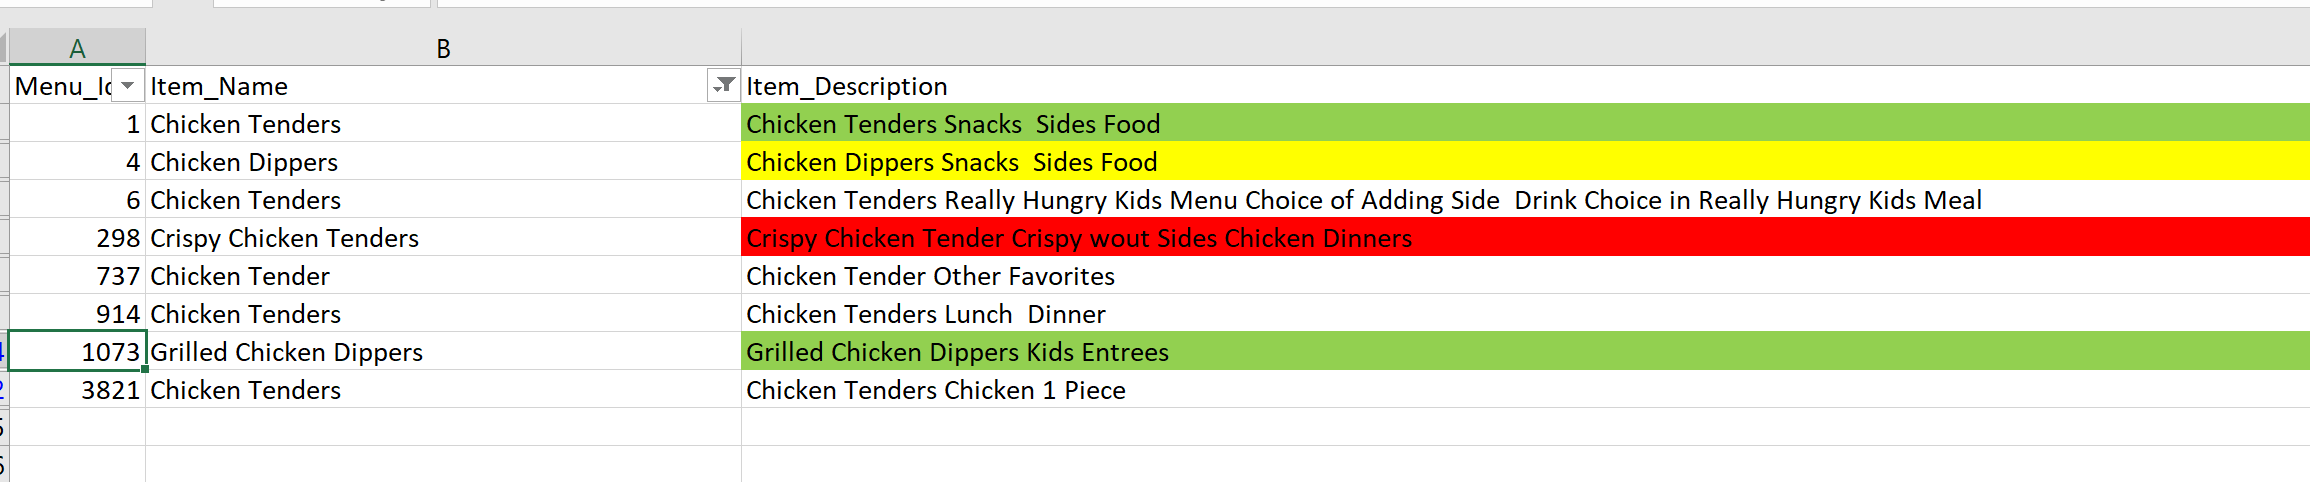